# ***Proyecto 2 – Predecir la calidad del vino***

Materia: Machine Learning I

Abril 2024

Integrantes:

- Diego Fernando Alfaro Quintero

- Diana Milena Chaparro Macias

- Mayra Dahian Rosero Franco

 5. **Ahora en una celda de código cargue la base winequality-red.csv determine la cantidad de variables y registros, indique cuales son numéricas y cualitativas y haga un resumen de esa información.**

 6. La variable quality es la variable objetivo, con lo consultado anteriormente haga una regresión lineal para predecir quality. Evalue los valores del error cuadrático medio y R2. Haga sus conclusiones, si ve la posibilidad de reentrenar el modelo y mejorar sus resultados hágalo.

 7. **Asumiremos que si quality es mayor o igual a 6 entonces el vino es bueno, en otro caso diremos que tiene calidad regular. Haga una variable nueva con esta condición y llámela categorical_quality.** Esta nueva variable será la variable objetivo de nuestra regresión logística.

 8. **Haga una partición de la base 80-20 para determinar base de entrenamiento y testeo para la regresión logística**. Posteriormente, entrene la regresión logística con la base de entrenamiento.

 9. Resuma los estadísticos de validación según la implementación en la base de testeo.

 10. Saque sus conclusiones, si ve la posibilidad de reentrenar el modelo y mejorar sus resultados hágalo.

 11. En un párrafo explique ¿Cuál de los dos modelos fue mejor? Justifique adecuadamente su respuesta.

# **Descripción de la base de datos**

Es un conjunto de datos públicos que explica las características del vino tinto Portugués. En este se encuentran 1599 registros y 12 atributos, donde 11 son varialbes de entrada que describen las cualidades físicas del vino y el resultado es una calificación de la calidad del vino donde 0 es muy mala y 10 es excelente. Esta calificación es el resultado de la mediana de las evaluaciones realizadas por expertos en vino.

# **Caracterísiticas físicas del vino**

El conjunto de datos tiene 12 variables, las variables son: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, and quality.
A continuación se describirá cada una de las variables.

1. **fixed acidity**

Esta relacionado con la acidez fija del vino, por lo ranto es inamovible.

2. **volatile acidity**

Esta relacionado con la acidez volátil del vino, formado por compuestos de tipos de ácido que muestran un aroma.

3. **citric acid**

Esta relacionado con el ácido cítrico del vino, aporta frescura contribuyendo al equilibrio gustativo del vino.

4. **residual sugar**

Esta relacionado con el azúcar que queda de las uvas luego de la fermentación del vino.

5. **chlorides**

Esta relacionado con el sabor del vino, el cual puede darle un sabor salado.

6. **free sulfur dioxide**

Esta relacionado con el dióxido de azufre libre que ayuda a prevenir el crecimiento microbiano y la oxidación del vino. En gran cantidad puede afectar el sabor del vino.

7. **total sulfur dioxide**

Está relacionado a la porción de dióxido de azufre que está libre en el vino y qué también está unida a otras sustancias quimicas del vino.

8. **density**

La densidad es la masa por volumen de un vino.

9. **pH**

Es una cualidad usada para medir la acidéz o alcalinidad de un líquido. El rango es de 0 a 14 y 7 es el valor neutral. Menores que 7 significa una sustancia más acida y mayores que 7 una sustancia básica. El pH ideal para los vinos tintos es de 3.3 a 3.6.

10. **sulphates**

Está relacionado con la presencia de sulfatos en el vino, estos actúan como conservante inhibiendo el crecimiento microbiano. La cantidad ideal para el vino tinto es de 40 a 50 ppm.

11. **alcohol**

Está relacionado con el grado de alcohol del vino.

12. **quality**

Está relacionada con la calificación que recibió cada vino, donde 0 es muy malo y 10 es excelente.



#**Análisis de la base de datos**

Se importan las librerías necesarias para el manejo de los datos

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(style='whitegrid', context='notebook')

Se importa la base de datos en la variable df

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/dianamilenachaparro/DataBase/main/winequality-red.csv', sep=";")
df.columns = df.columns.str.replace(' ', '_')

Se obtiene el tamaño de la base de datos

In [ ]:
df.shape

(1599, 12)

Con la función info, se obtiene información sobre la cantidad y el tipo de dato de cada variable.

In [ ]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Se evidencia que no existen valores nulos en las variables.

Se inicia analizando la variable quality para conocer sobre los estadísiticos.

In [ ]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

Se evidencia que la media de la calidad es 5.6, un valor que según la calificación está entre lo bueno y malo. La desviación con un valor de 0.8 muestra que los datos se encuentran agrupados a la media.
Para verificar esto, se realiza un histograma de la variable.

<Axes: xlabel='quality', ylabel='Count'>

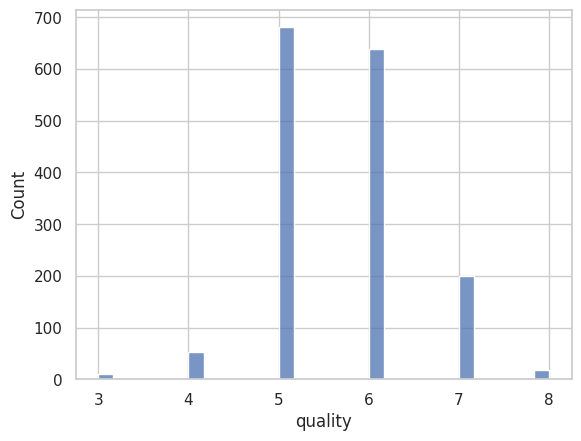

In [ ]:
sns.histplot(df['quality'])

En el histograma se evidencia que los datos se concentran entre la calidad de 5 y 6.

Se realiza gráfica de densidad de cada una de las variables

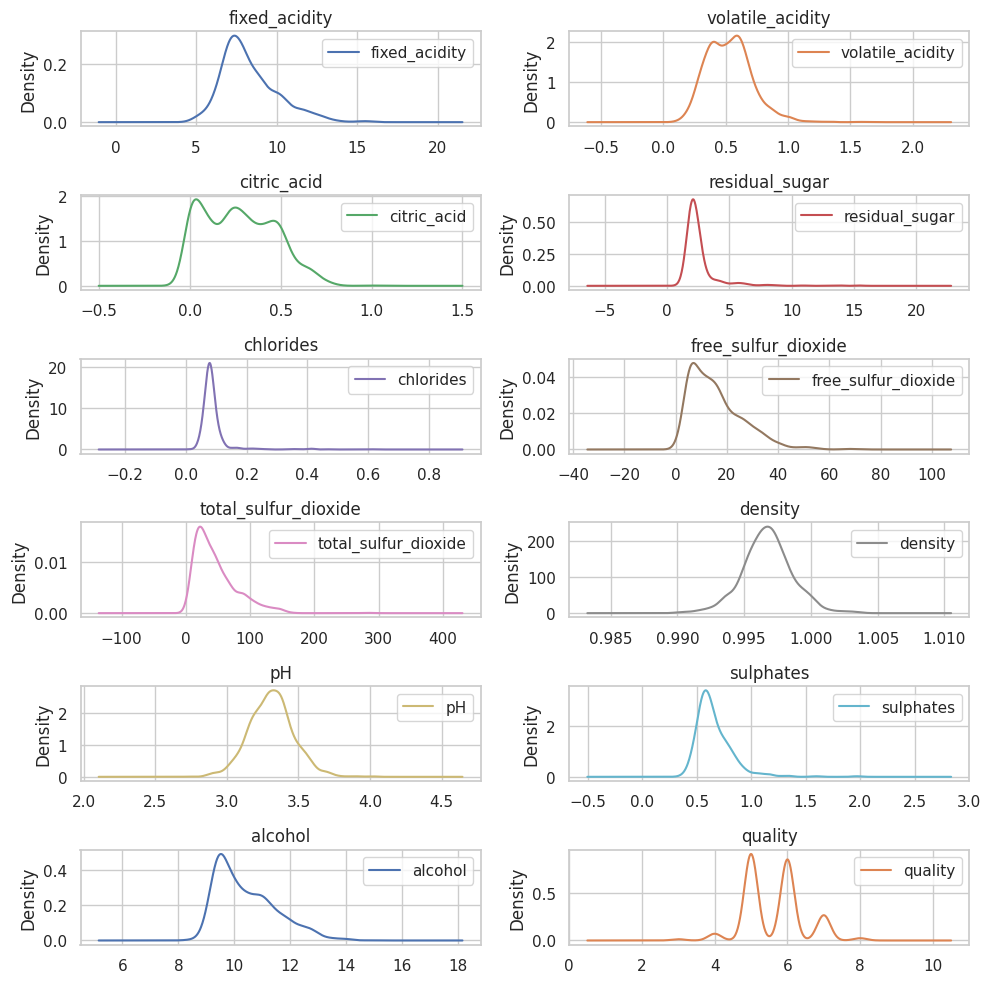

In [ ]:
axes = df.plot(kind='density', subplots=True, layout=(6, 2), sharex=False, figsize=(10, 10))

# extrae el objeto de la figura
fig = axes[0][0].get_figure()

# selecciona los títulos individuales
for ax, title in zip(axes.ravel(), df.columns):
    ax.set_title(title)
fig.tight_layout()
plt.show()

Se realiza histograma de los datos

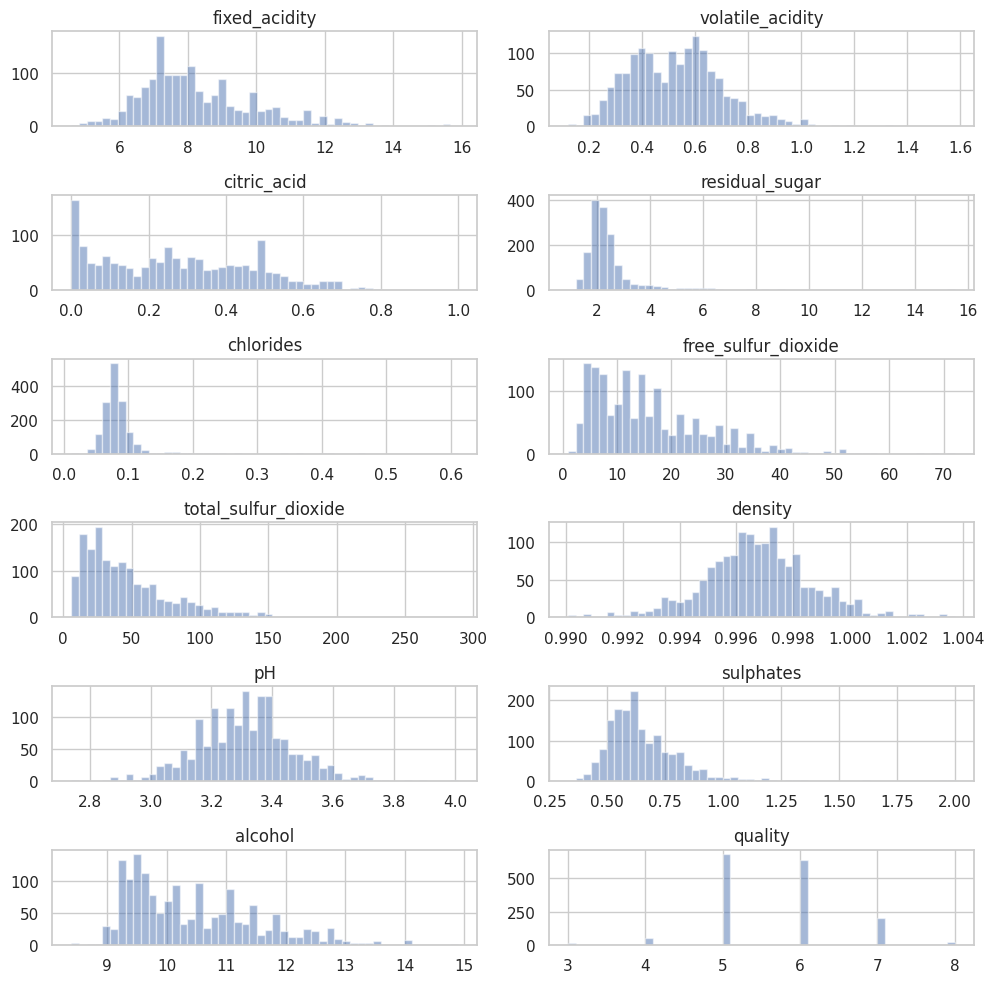

In [ ]:
axes = df.hist(figsize=(10,10),layout=(6, 2), bins=50, alpha = 0.5)
fig = axes[0][0].get_figure()
fig.tight_layout()
plt.show()

Se evidencia que las variables citric acid, volatile acidity, free sulfur dioxide y alcohol son las que mayor variabilidad presentan en los datos.

In [ ]:
def estadisticos(bd, variable):
  media = bd[variable].describe()['mean']
  desviacion = bd[variable].describe()['std']
  print(f'La media de la variable {variable} es: {media :.2f}')
  print(f'La desviación estándar de la variable {variable} es: {desviacion :.2f}')
  print(f'El porcentaje de relación entre la desviación y la media de la variable {variable} es: {(desviacion/media)*100 :.2f}%\n')

estadisticos(df,'citric_acid')
estadisticos(df,'volatile_acidity')
estadisticos(df,'free_sulfur_dioxide')
estadisticos(df,'alcohol')

La media de la variable citric_acid es: 0.27
La desviación estándar de la variable citric_acid es: 0.19
El porcentaje de relación entre la desviación y la media de la variable citric_acid es: 71.89%

La media de la variable volatile_acidity es: 0.53
La desviación estándar de la variable volatile_acidity es: 0.18
El porcentaje de relación entre la desviación y la media de la variable volatile_acidity es: 33.92%

La media de la variable free_sulfur_dioxide es: 15.87
La desviación estándar de la variable free_sulfur_dioxide es: 10.46
El porcentaje de relación entre la desviación y la media de la variable free_sulfur_dioxide es: 65.89%

La media de la variable alcohol es: 10.42
La desviación estándar de la variable alcohol es: 1.07
El porcentaje de relación entre la desviación y la media de la variable alcohol es: 10.22%



In [ ]:
corr = df.corr()
corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Se evidencia que la variable con mayor correlación es Alcohol.

# **Análisis de las variables respecto a la calidad del vino.**

Se crea la variable categorical_quality, donde si la calidad es mayor e igual a 6, es considerado bueno y si no, es considerado regular.

In [ ]:
df['categorical_quality']= ["bueno" if s >= 6 else "regular" for s in df["quality"]]

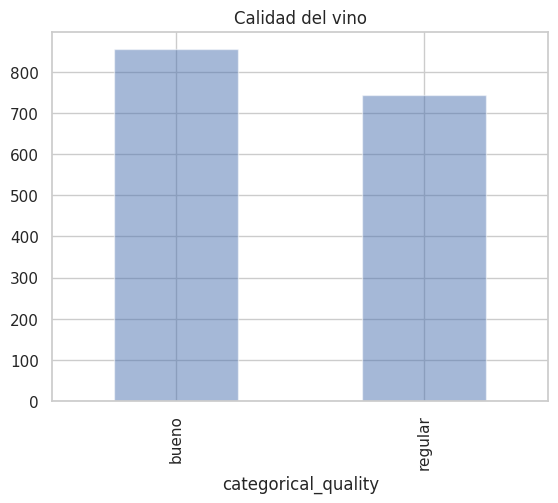

In [ ]:
df['categorical_quality'].value_counts().plot(kind='bar', alpha = 0.5)
plt.title('Calidad del vino')
plt.show()

Se evidencian mayor cantidad de vinos de calidad buena.

In [ ]:
def histogramas_calidad(bd,variable):
    a = bd[bd['categorical_quality'] =='regular']
    b = bd[bd['categorical_quality']=='bueno']
    #bins = np.linspace(-10, 20, 50)

    plt.hist(a[variable], 20, alpha = 0.5, label='regular')
    plt.hist(b[variable], 20, alpha = 0.5, label='bueno')
    plt.legend(loc='upper right')
    title = "Distribucion de " + variable + " agrupado por la calidad del vino"
    plt.title(title)
    plt.xlabel(variable)
    plt.ylabel("Frecuencia")
    plt.show()

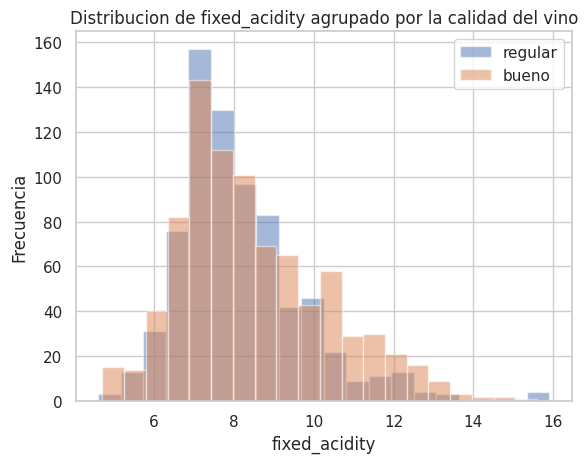

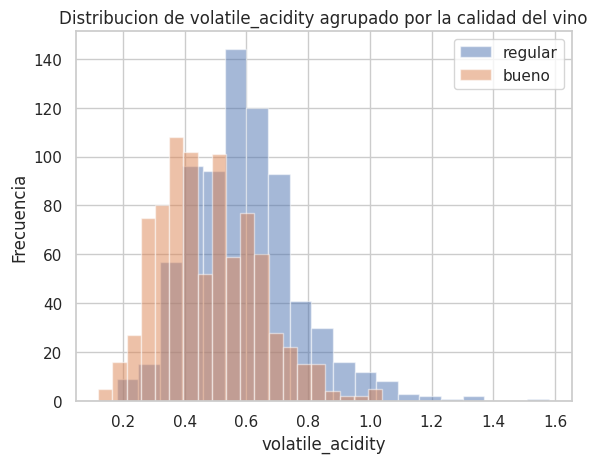

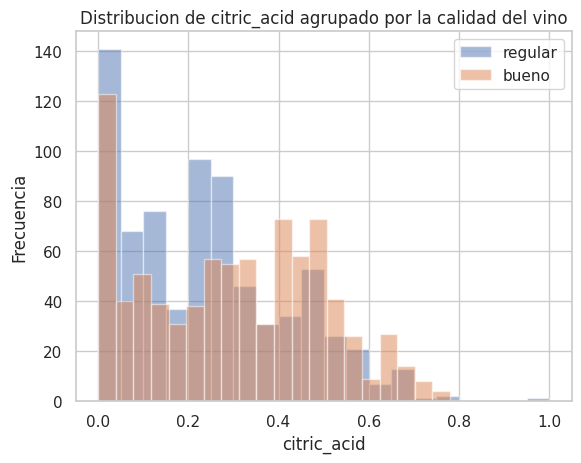

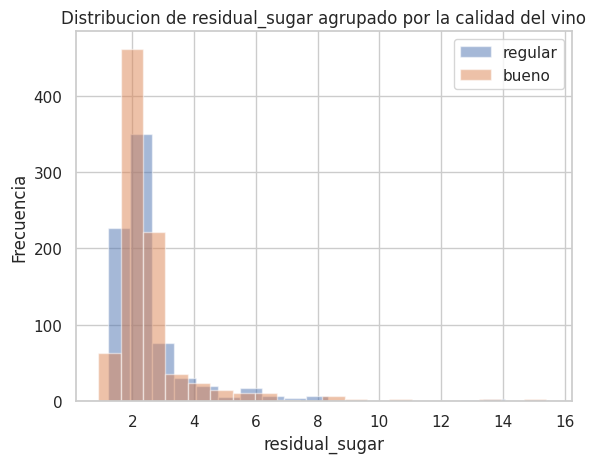

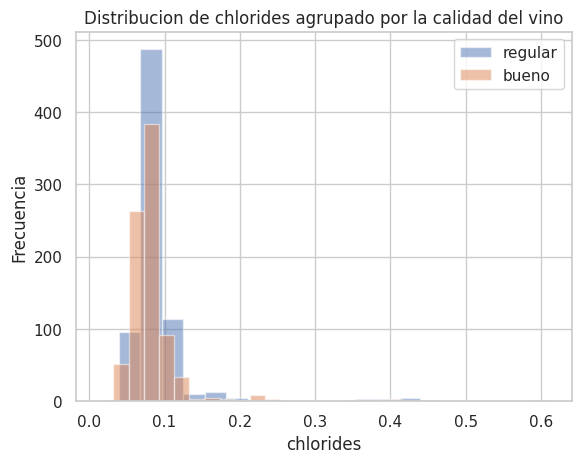

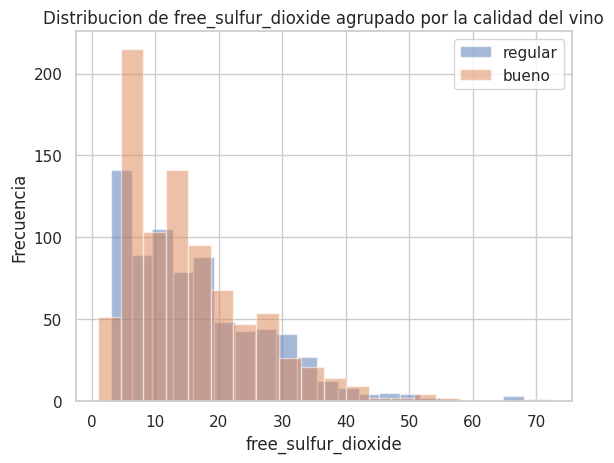

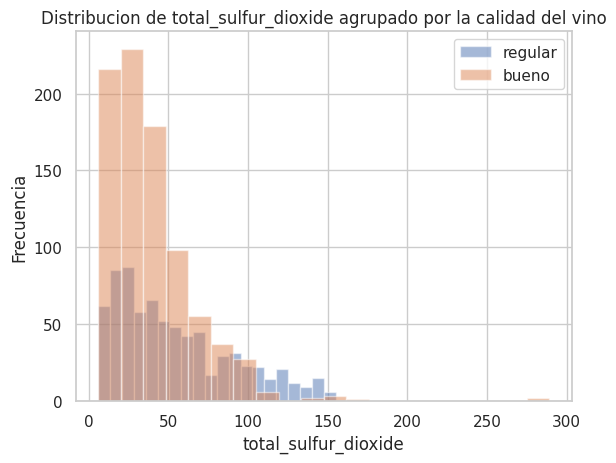

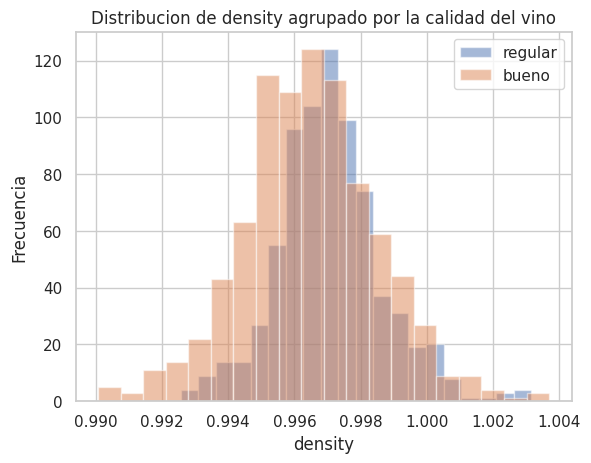

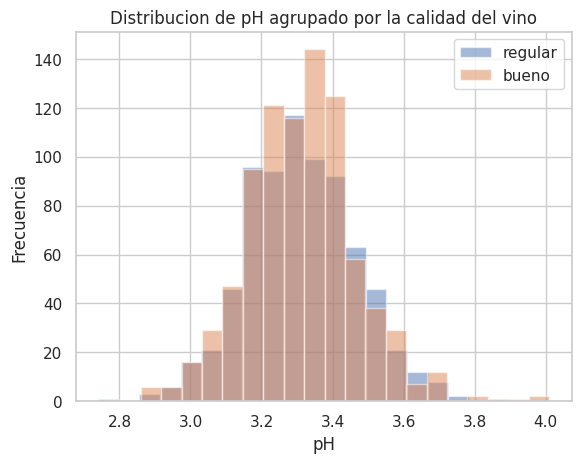

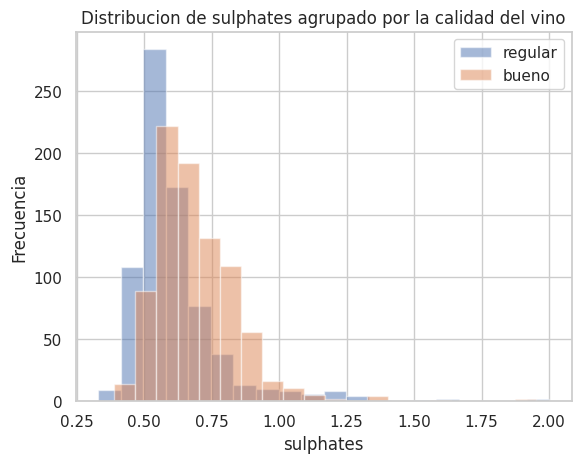

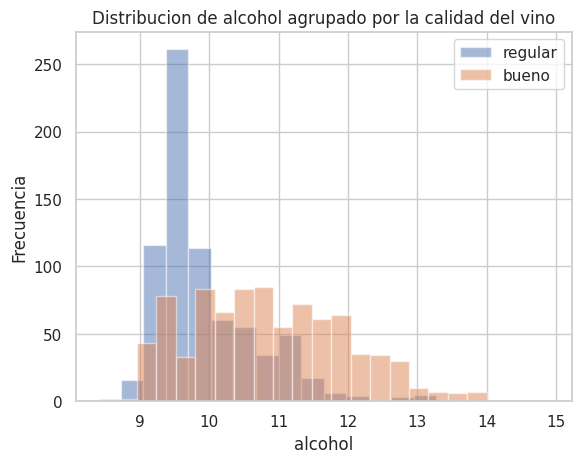

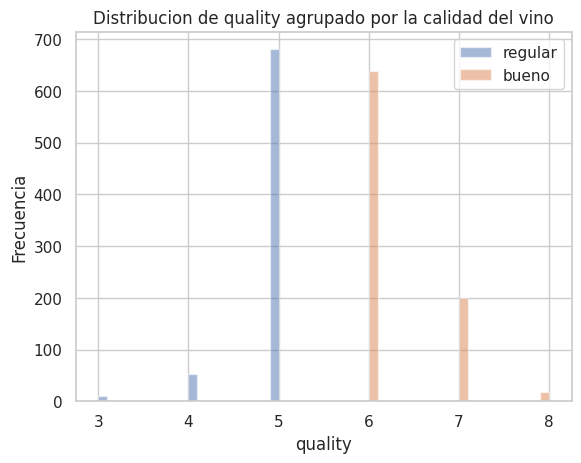

In [ ]:
cols = df.columns
cols = cols[0:-1]
for i in range(len(cols)):
  histogramas_calidad(df,cols[i])

## **Conclusiones:**

Se evidencia que para la variable volatile acidity, los mejores vinos tienen valores bajos de volatilidad.
En la variable critic acid los vinos con acidos más bajos son clasificados como regulares, para que el vino sea bueno, los datos se centran entre 0.4 y 0.6.
En la variable residual sugar se evidencia una tendencia similar para ambas clases.
En la variable alcohol se evidencia que los vinos con menor concentración de alcohol son clasificados como regulares.

## **REGRESIÓN LINEAL MULTIPLE**




In [ ]:
import statistics
#from fancyimpute import IterativeImputer
from scipy.stats import shapiro, anderson
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import auc

In [ ]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'categorical_quality'],
      dtype='object')

In [ ]:
X = df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]  # Agrega todas las variables independientes

y = df['quality']  # Agrega la variable dependiente

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inicializar y ajustar el modelo de regresión lineal múltiple
modelo = LinearRegression()
modelo.fit(X_train, y_train)

train_predictions = modelo.predict(X_train)
test_predictions = modelo.predict(X_test)

# Calculamos el coeficiente de determinación (R^2) en el conjunto de entrenamiento y en el conjunto de prueba
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Error Cuadrático Medio (MSE) en el conjunto de entrenamiento:", train_mse)
print("Error Cuadrático Medio (MSE) en el conjunto de prueba:", test_mse)

print("\nCoeficiente de determinación (R^2) en el conjunto de entrenamiento:", train_r2)
print("Coeficiente de determinación (R^2) en el conjunto de prueba:", test_r2, '\n')

# Agregar una constante a las variables independientes (intercepto)
X = sm.add_constant(X)

# Inicializar y ajustar el modelo de regresión lineal múltiple con statsmodels
modelo = sm.OLS(y, X)
resultado = modelo.fit()

# Obtener un resumen completo del modelo
print(resultado.summary())

Error Cuadrático Medio (MSE) en el conjunto de entrenamiento: 0.4241911573139901
Error Cuadrático Medio (MSE) en el conjunto de prueba: 0.390025143963955

Coeficiente de determinación (R^2) en el conjunto de entrenamiento: 0.3479926193529862
Coeficiente de determinación (R^2) en el conjunto de prueba: 0.40318034127962177 

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Sat, 04 May 2024   Prob (F-statistic):          1.79e-145
Time:                        22:40:27   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11      

## **REGRESIÓN LINEAL MULTIPLE CON REDUCCIÓN DE VARIABLES**

Se evaluan las variables y se consideda eliminar aquellas que esten con p-valores por encima de 0.05 ya que no contribuye significativamente al modelo.

In [ ]:
X = df[['volatile_acidity',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide',
       'pH', 'sulphates', 'alcohol']]  # Agrega todas las variables independientes

y = df['quality']  # Agrega la variable dependiente

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inicializar y ajustar el modelo de regresión lineal múltiple
modelo = LinearRegression()
modelo.fit(X_train, y_train)

train_predictions = modelo.predict(X_train)
test_predictions = modelo.predict(X_test)

# Calculamos el coeficiente de determinación (R^2) en el conjunto de entrenamiento y en el conjunto de prueba
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Error Cuadrático Medio (MSE) en el conjunto de entrenamiento:", train_mse)
print("Error Cuadrático Medio (MSE) en el conjunto de prueba:", test_mse)

print("\nCoeficiente de determinación (R^2) en el conjunto de entrenamiento:", train_r2)
print("Coeficiente de determinación (R^2) en el conjunto de prueba:", test_r2, '\n')

# Agregar una constante a las variables independientes (intercepto)
X = sm.add_constant(X)

# Inicializar y ajustar el modelo de regresión lineal múltiple con statsmodels
modelo = sm.OLS(y, X)
resultado = modelo.fit()

# Obtener un resumen completo del modelo
print(resultado.summary())

Error Cuadrático Medio (MSE) en el conjunto de entrenamiento: 0.4245328036654051
Error Cuadrático Medio (MSE) en el conjunto de prueba: 0.3912782138290928

Coeficiente de determinación (R^2) en el conjunto de entrenamiento: 0.34746748831512053
Coeficiente de determinación (R^2) en el conjunto de prueba: 0.4012628835442983 

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     127.6
Date:                Sat, 04 May 2024   Prob (F-statistic):          5.32e-149
Time:                        22:40:27   Log-Likelihood:                -1570.5
No. Observations:                1599   AIC:                             3157.
Df Residuals:                    1591   BIC:                             3200.
Df Model:                           7     

## **REGRESIÓN LINEAL MULTIPLE CON REGULARIZACIÓN L1-LASSO**

In [ ]:
X = df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]  # Agrega todas las variables independientes

y = df['quality']  # Agrega la variable dependiente aquí

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inicializar y ajustar el modelo de regresión lineal múltiple
modelo = Lasso(alpha=0.1)
modelo.fit(X_train, y_train)

train_predictions = modelo.predict(X_train)
test_predictions = modelo.predict(X_test)

# Calculamos el coeficiente de determinación (R^2) en el conjunto de entrenamiento y en el conjunto de prueba
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Error Cuadrático Medio (MSE) en el conjunto de entrenamiento:", train_mse)
print("Error Cuadrático Medio (MSE) en el conjunto de prueba:", test_mse)

print("\nCoeficiente de determinación (R^2) en el conjunto de entrenamiento:", train_r2)
print("Coeficiente de determinación (R^2) en el conjunto de prueba:", test_r2, '\n')


Error Cuadrático Medio (MSE) en el conjunto de entrenamiento: 0.4631389858100345
Error Cuadrático Medio (MSE) en el conjunto de prueba: 0.4392249149065927

Coeficiente de determinación (R^2) en el conjunto de entrenamiento: 0.28812745903141446
Coeficiente de determinación (R^2) en el conjunto de prueba: 0.327894450209431 



## **REGRESIÓN LINEAL MULTIPLE CON REGULARIZACIÓN L2-RIDGE**

In [ ]:
X = df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]  # Agrega todas las variables independientes aquí

y = df['quality']  # Agrega la variable dependiente aquí

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inicializar y ajustar el modelo de regresión lineal múltiple
modelo = Ridge(alpha=1.0)
modelo.fit(X_train, y_train)

train_predictions = modelo.predict(X_train)
test_predictions = modelo.predict(X_test)

# Calculamos el coeficiente de determinación (R^2) en el conjunto de entrenamiento y en el conjunto de prueba
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Error Cuadrático Medio (MSE) en el conjunto de entrenamiento:", train_mse)
print("Error Cuadrático Medio (MSE) en el conjunto de prueba:", test_mse)

print("\nCoeficiente de determinación (R^2) en el conjunto de entrenamiento:", train_r2)
print("Coeficiente de determinación (R^2) en el conjunto de prueba:", test_r2, '\n')

Error Cuadrático Medio (MSE) en el conjunto de entrenamiento: 0.42419134339006004
Error Cuadrático Medio (MSE) en el conjunto de prueba: 0.39003800591460774

Coeficiente de determinación (R^2) en el conjunto de entrenamiento: 0.3479923333428493
Coeficiente de determinación (R^2) en el conjunto de prueba: 0.4031606598177524 



### **CONCLUSIONES**

Los resultados arrojados fueron los siguientes:

- Error Cuadrático Medio (MSE):
 * Regresión lineal sin reducción de variables:
  MSE en conjunto de entrenamiento: 0.4241911573139901
  MSE en conjunto de prueba: 0.390025143963955

 * Regresión lineal con reducción de variables:
MSE en conjunto de entrenamiento: 0.4245328036654051
MSE en conjunto de prueba: 0.3912782138290928

 * Regresión lineal con regularización L1 (Lasso):
MSE en conjunto de entrenamiento: 0.4631389858100345
MSE en conjunto de prueba: 0.4392249149065927

 * Regresión lineal con regularización L2 (Ridge):
MSE en conjunto de entrenamiento: 0.42419134339006004
MSE en conjunto de prueba: 0.39003800591460774

- Coeficiente de determinación (R^2):
 * Regresión lineal sin reducción de variables:
R^2 en conjunto de entrenamiento: 0.3479926193529862
R^2 en conjunto de prueba: 0.40318034127962177

 * Regresión lineal con reducción de variables:
R^2 en conjunto de entrenamiento: 0.34746748831512053
R^2 en conjunto de prueba: 0.4012628835442983

 * Regresión lineal con regularización L1 (Lasso):
R^2 en conjunto de entrenamiento: 0.28812745903141446
R^2 en conjunto de prueba: 0.327894450209431

 * Regresión lineal con regularización L2 (Ridge):
R^2 en conjunto de entrenamiento: 0.3479923333428493
R^2 en conjunto de prueba: 0.4031606598177524

De acuerdo con los resultados de R^2 el modelo de regresión lineal con reducción de variables tiene un mejor resultado seguido de el modelo Ridge y revizando el resultado de MSE estos mismos modelos tiene resultados similares.

# **REGRESIÓN LOGÍSTICA**

In [ ]:
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, roc_auc_score, classification_report

import warnings
warnings.filterwarnings("ignore")

X = df.drop(['quality','categorical_quality'], axis=1)
y = df['categorical_quality']

# Generación de variable binaria

Se convierte la variable categorical_quality, a binaria de acuerdo al límite de 6 (0 si es menor que 6, 1 si es igual o mayor a 6).

In [ ]:
df['categorical_quality'].replace('bueno', 1, inplace = True)
df['categorical_quality'].replace('regular', 0, inplace = True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  categorical_quality   1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB
None


In [ ]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,categorical_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


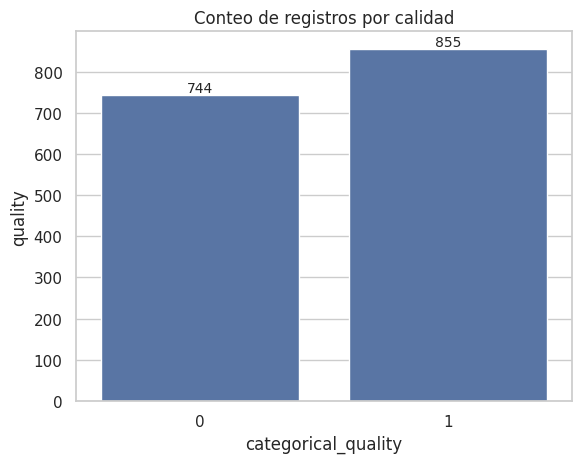

In [ ]:
ax = sns.barplot(df.groupby('categorical_quality',as_index=False).count(), x = 'categorical_quality', y = 'quality');
ax.set(title='Conteo de registros por calidad')
ax.bar_label(ax.containers[0], fontsize=10);

Se nota un desbalanceo en los registros, por lo que se tendrán en cuenta por lo menos dos métodos de evaluación de los modelos (accuracy y roc_auc_score)

## **Validación de supuestos de la regresión logística**

### 1. Multicolinealidad

Se genera un gráfico de correlación y se calcula el factor de inflación de varianza de las variables independientes.

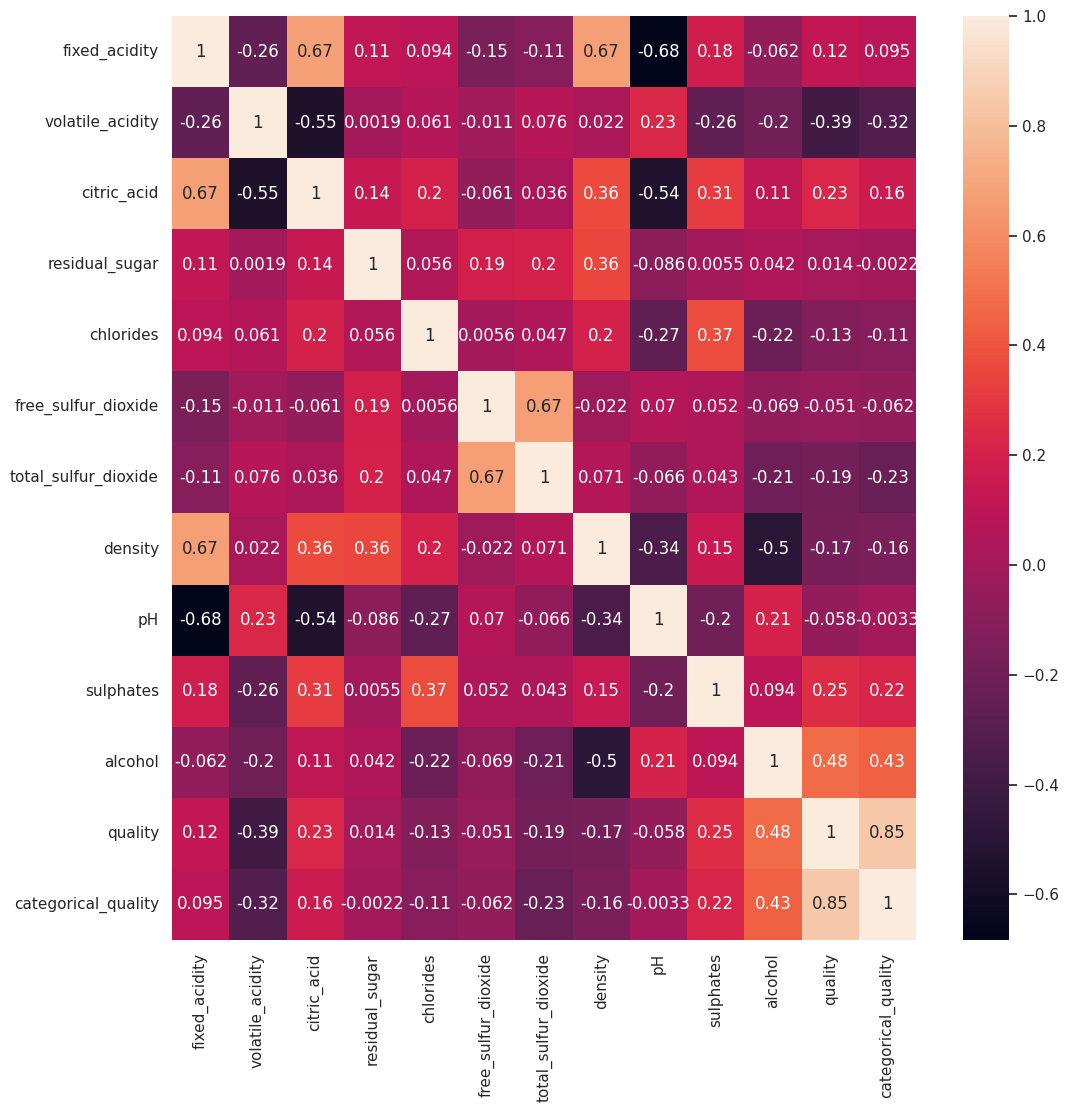

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
def compute_vif(considered_features):

    X_vif = df[considered_features]
    # la función variance_inflation_factor requiere una constante en las columnas enviadas para cálculo.
    # Se agrega la constante al final del dataframe
    X_vif = sm.add_constant(X_vif, prepend=False)

    vif = pd.DataFrame()
    vif["Variable"] = X_vif.columns
    vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
    vif = vif[vif['Variable']!='const']

    return vif

considered_features = list(X.columns)
print(compute_vif(considered_features))

                Variable       VIF
0          fixed_acidity  7.767512
1       volatile_acidity  1.789390
2            citric_acid  3.128022
3         residual_sugar  1.702588
4              chlorides  1.481932
5    free_sulfur_dioxide  1.963019
6   total_sulfur_dioxide  2.186813
7                density  6.343760
8                     pH  3.329732
9              sulphates  1.429434
10               alcohol  3.031160


Como se observa la variable que más multicolinealidad tiene con las otras variables independientes es fixed_acidity. En la generación del modelo de regresión logística estará en la lista de variables a retirar para no afectar el ajuste de los coeficientes.

### 2. Linealidad entre variables independientes y log de probabilidad

Se valida la relación lineal entre cada variable independiente y log de probabilidad mediante la prueba de Box Tidwell. Para esto se deben eliminar los registros que tengan valores iguales a 0 en las variables independientes.

In [ ]:
filas_con_0 = []
for indice_fila, fila in df.iterrows():
    for col in df.iloc[:,:11]:
        if (df.loc[indice_fila,col] == 0.00):
            filas_con_0.append(indice_fila)
print(len(filas_con_0)/len(X))

0.0825515947467167


Los registros a eliminar para la prueba de Box Tidwell son apenas el 8.25% del total.

In [ ]:
df_box_tidwell = df.drop(filas_con_0)
df_box_tidwell.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,categorical_quality
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


Se agrega una columna por cada variable continua con el resultado de variable * log (variable). Los datos de estas columnas se utilizarán para validar la relación lineal,

In [ ]:
var_continuas = X.columns

for var in var_continuas:
    df_box_tidwell[f'{var}:Log_{var}'] = df_box_tidwell[var].apply(lambda x: x * np.log(x))

df_box_tidwell.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,...,volatile_acidity:Log_volatile_acidity,citric_acid:Log_citric_acid,residual_sugar:Log_residual_sugar,chlorides:Log_chlorides,free_sulfur_dioxide:Log_free_sulfur_dioxide,total_sulfur_dioxide:Log_total_sulfur_dioxide,density:Log_density,pH:Log_pH,sulphates:Log_sulphates,alcohol:Log_alcohol
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,-0.208572,-0.128755,1.915691,-0.219509,40.620753,215.405139,-0.002995,3.852431,-0.280009,22.367347
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,-0.356430,-0.324698,1.219522,-0.194270,48.164627,245.660674,-0.001998,3.635808,-0.315942,22.367347
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,...,-0.306495,-0.168805,0.752006,-0.184482,40.620753,240.574709,-0.003594,3.939944,-0.357203,21.062671
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,...,-0.315942,-0.078240,1.386294,-0.191063,19.775021,52.026692,-0.003195,4.072122,-0.320408,21.387272
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,...,-0.346574,-0.367794,11.030562,-0.187800,48.164627,471.747227,-0.002198,4.050017,-0.178515,24.689440


Se forman los dataframe de variables independientes y dependiente. Se agrega una constante para poder utilizar la función GLM de statsmodels.

In [ ]:
X_lt = df_box_tidwell.drop(['quality','categorical_quality'], axis=1)
y_lt = df_box_tidwell['categorical_quality']

print(X_lt.isnull().values.any())

# Se agrega una constante
X_lt = sm.add_constant(X_lt, prepend=False)
logit_results = GLM(y_lt, X_lt, family=families.Binomial()).fit()

print(logit_results.summary())

False
                  Generalized Linear Model Regression Results                  
Dep. Variable:     categorical_quality   No. Observations:                 1467
Model:                             GLM   Df Residuals:                     1444
Model Family:                 Binomial   Df Model:                           22
Link Function:                   Logit   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:                -736.96
Date:                 Sat, 04 May 2024   Deviance:                       1473.9
Time:                         22:40:30   Pearson chi2:                 1.45e+03
No. Iterations:                      5   Pseudo R-squ. (CS):             0.3127
Covariance Type:             nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------

De este resumen, se evalúan los resultados de P>|z| para las columnas logaritmicas generadas. Si es menor a 0.05, se denota una relación no lineal de la variable original. Estas variables fixed_acidity , free_sulfur_dioxide, density y sulphates también entran en consideración para no ser tenidas en cuenta en la generación del modelo logístico.

### 3. No hay outliers fuertemente influyentes

Se evalúa la cantidad de datos que son altamente influyentes mediante la distancia de Cook. Para esto se genera un modelo con la totalidad de los registros disponibles.

In [ ]:
features = df[considered_features]
target = df['categorical_quality']

features = sm.add_constant(features, prepend=False)

logit_model = GLM(target, features, family=families.Binomial())
logit_results = logit_model.fit()
print(logit_results.summary())

                  Generalized Linear Model Regression Results                  
Dep. Variable:     categorical_quality   No. Observations:                 1599
Model:                             GLM   Df Residuals:                     1587
Model Family:                 Binomial   Df Model:                           11
Link Function:                   Logit   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:                -827.81
Date:                 Sat, 04 May 2024   Deviance:                       1655.6
Time:                         22:40:30   Pearson chi2:                 1.87e+03
No. Iterations:                      5   Pseudo R-squ. (CS):             0.2925
Covariance Type:             nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed_acidity         

In [ ]:
influence = logit_results.get_influence()
summ_df = influence.summary_frame()
diagnosis_df = summ_df.loc[:,['cooks_d']]

diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
diagnosis_df['std_resid'] = diagnosis_df.loc[:,'std_resid'].apply(lambda x: np.abs(x))

diagnosis_df.sort_values("cooks_d", ascending=False)
diagnosis_df.head()

,cooks_d,std_resid
0,0.000085,0.485895
1,0.000148,0.495053
2,0.000099,0.553547
3,0.000572,0.865427
4,0.000085,0.485895


Se establece el límite de la distancia de Cook para detectar los registros altamante influyentes. Se presenta una gráfica que traza este límite y muestra la distancia de Cook de cada registro.

Límite de distancia de Cook = 0.0025015634771732333


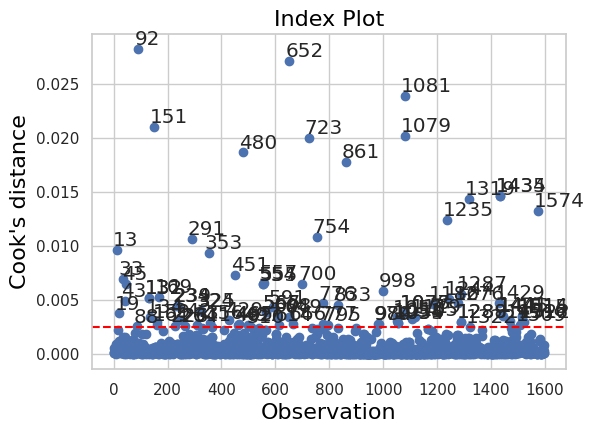

In [ ]:
# Se establece ímite de distancia de Cook
cook_threshold = 4 / len(df)
print(f"Límite de distancia de Cook = {cook_threshold}")

fig = influence.plot_index(y_var="cooks", threshold=cook_threshold)
plt.axhline(y = cook_threshold, ls="--", color='red')
fig.tight_layout(pad=2)

Se calcula el número de registros que superan el límite (outliers) y se encuentra que tan solo son el 5.3% del total.

In [ ]:
outliers = diagnosis_df[diagnosis_df['cooks_d'] > cook_threshold]
prop_outliers = round(100*(len(outliers) / len(df)),1)
print(f'Porcentaje de observaciones que son altamente influyentes = {prop_outliers}%')

Porcentaje de observaciones que son altamente influyentes = 5.3%


Se filtran los outliers de acuerdo a la desviación estandar de residuos para identificar los considerados outliers extremos (std dev > 3). Se encuentra que son solo el 0.3% del total de registros.

In [ ]:
extreme = diagnosis_df[(diagnosis_df['cooks_d'] > cook_threshold) &
                       (diagnosis_df['std_resid'] > 3)]
prop_extreme = round(100*(len(extreme) / len(df)),1)
print(f'Porcentaje de outliers extremos = {prop_extreme}%')

Porcentaje de outliers extremos = 0.3%


### 4. Independencia de las observaciones

Se valida visualmente la desviación estándar de los residuos de cada registro para identificar que no hay un patrón y que efectivamente se cumple este supuesto.

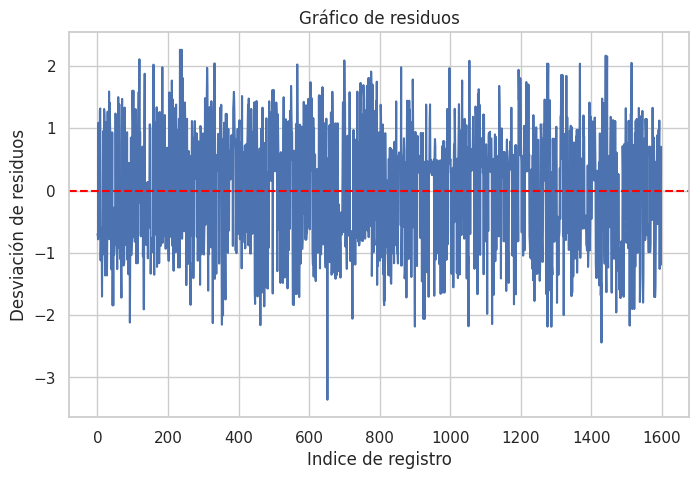

In [ ]:
logit_results = GLM(target, features, family=families.Binomial()).fit()

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, title="Gráfico de residuos", xlabel="Indice de registro", ylabel="Desviación de residuos")
ax.plot(df.index.tolist(), stats.zscore(logit_results.resid_deviance))
plt.axhline(y = 0, ls="--", color='red');

### 5. Tamaño de muestra suficientemente grande

Se recomienda tener por lo menos 50 registros por cada variable independiente utilizada en el modelo. Este supuesto se cumple.

In [ ]:
print("Número total de registros :",len(df))
print("Número mínimo de registros para cumplir la recomendación :",len(features.columns)*50)

Número total de registros : 1599
Número mínimo de registros para cumplir la recomendación : 600


## **Modelo de regresión logística**

### Versión 1: Cumpliendo no multicolinealidad

Primero se remueve la variable independiente fixed_acidity que genera la multicolinealidad más alta, y se recalcula el factor de inflación de varianza. Se observa que todas las variables independientes quedan por debajo de 5, que es lo recomendado.

In [ ]:
considered_features.remove('fixed_acidity')
print("\n", compute_vif(considered_features))


                Variable       VIF
0      volatile_acidity  1.784963
1           citric_acid  2.780557
2        residual_sugar  1.386375
3             chlorides  1.401232
4   free_sulfur_dioxide  1.939209
5  total_sulfur_dioxide  2.069396
6               density  2.430096
7                    pH  1.610775
8             sulphates  1.396382
9               alcohol  2.136067


Se crean los dataframes de variables independientes y dependiente con la nueva lista de variables independientes consideradas para el modelo.

Se escalan las variables independientes mediante MinMaxScaler y se agrega la constante para ser utilizada en el ajuste GLM.

Se dividen los datos 80/20 en entrenamiento y prueba.

In [ ]:
features = df[considered_features]
target = df['categorical_quality']

norm = MinMaxScaler()
Xsc = pd.DataFrame(norm.fit_transform(features),columns = features.columns)
Xsc = sm.add_constant(Xsc, prepend=False)

xtrain, xtest, ytrain, ytest = train_test_split(Xsc, target, test_size=0.2, random_state=40, stratify=target)

xtrain.shape, xtest.shape

((1279, 11), (320, 11))

La fórmula a utilizar en el modelo se muestra a continuación.

In [ ]:
all_columns = ' + '.join(features.columns)
formula = "categorical_quality ~ " + all_columns
print("Formula: ", formula, "\n")

Formula:  categorical_quality ~ volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol 



In [ ]:
modelLG = GLM(ytrain, xtrain, family=families.Binomial()).fit()
modelLG.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                  
===============================================================================
Dep. Variable:     categorical_quality   No. Observations:                 1279
Model:                             GLM   Df Residuals:                     1268
Model Family:                 Binomial   Df Model:                           10
Link Function:                   Logit   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:                -655.72
Date:                 Sat, 04 May 2024   Deviance:                       1311.4
Time:                         22:40:32   Pearson chi2:                 1.55e+03
No. Iterations:                      5   Pseudo R-squ. (CS):             0.2996
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
volatile_acidity        -4.1153      0.796     -5.172      0.000      -5.675      -2.556
citric_acid             -0.7197      0.590     -1.220      0.223      -1.876       0.437
residual_sugar           0.8460      0.818      1.034      0.301      -0.757       2.449
chlorides               -2.5461      0.998     -2.553      0.011      -4.501      -0.591
free_sulfur_dioxide      1.9320      0.636      3.036      0.002       0.685       3.179
total_sulfur_dioxide    -5.3868      0.882     -6.106      0.000      -7.116      -3.658
density                  0.1461      0.775      0.189      0.850      -1.372       1.664
pH                      -1.7746      0.703     -2.524      0.012      -3.152      -0.397
sulphates                4.8818      0.853      5.726      0.000       3.211       6.553
alcohol                  6.2880      0.661      9.517      0.000       4.993       7.583
const                    0.0120      0.607      0.020      0.984      -1.177       1.201
========================================================================================
"""

Se prueba el modelo con los datos xtest y ytest. Se obtiene una buena exactitud del 71.8%

In [ ]:
pred_1 = modelLG.predict(xtest)
# <= 0.5 redondea a 0; > 0.5 redondea a 1
prediction_1 = list(map(round, pred_1))

# Exactitud
print('\nExactitud en prueba = ', accuracy_score(ytest, prediction_1))


Exactitud en prueba =  0.71875


Se muestran a continuación los coeficientes y el roc_auc_score, que es otra métrica del rendimiento del modelo.

ROC AUC (área bajo la curva característica de funcionamiento del receptor) compara la relación entre la tasa de verdaderos positivos y la tasa de falsos positivos teniendo en cuenta el limite de clasificación, mientras que accuracy es simplemente el porcentaje de predicciones correctas.

In [ ]:
print(modelLG.params)
roc_1 = roc_auc_score(ytest, modelLG.predict(xtest))
print('\nRegresión logística : ')
print('Exactitud en entrenamiento : ', roc_auc_score(ytrain, modelLG.predict(xtrain)))
print('Exactitud en prueba : ', roc_1)

volatile_acidity       -4.115307
citric_acid            -0.719656
residual_sugar          0.845994
chlorides              -2.546150
free_sulfur_dioxide     1.932030
total_sulfur_dioxide   -5.386767
density                 0.146087
pH                     -1.774566
sulphates               4.881797
alcohol                 6.288042
const                   0.011983
dtype: float64

Regresión logística : 
Exactitud en entrenamiento :  0.826313332350484
Exactitud en prueba :  0.7933984850268849


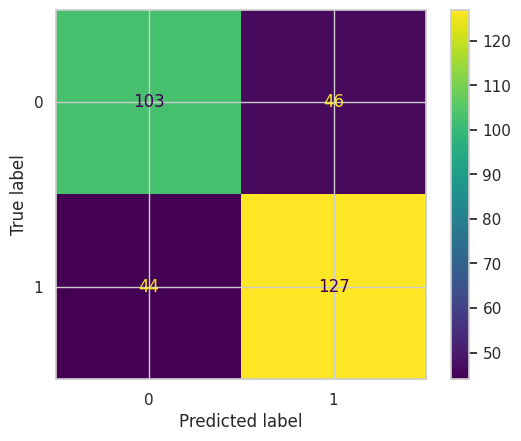

In [ ]:
cm = confusion_matrix(ytest, prediction_1)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
print(classification_report(ytest,prediction_1))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70       149
           1       0.73      0.74      0.74       171

    accuracy                           0.72       320
   macro avg       0.72      0.72      0.72       320
weighted avg       0.72      0.72      0.72       320



### Versión 2 - 4: Retirando variables no significantes

Se van retirando una a una las variables no significantes (P>|z| > 0.05) y evaluando su exactitud.

In [ ]:
considered_features.remove('density')
features = df[considered_features]

Xsc.drop('density', axis=1, inplace =True)
xtrain, xtest, ytrain, ytest = train_test_split(Xsc, target, test_size=0.2, random_state=40, stratify=target)

all_columns = ' + '.join(features.columns)
formula = "categorical_quality ~ " + all_columns
print("Formula: ", formula, "\n")

modelLG = GLM(ytrain, xtrain, family=families.Binomial()).fit()
print(modelLG.summary())

pred_2 = modelLG.predict(xtest)
prediction_2 = list(map(round, pred_2))
print('\nExactitud en prueba = ', accuracy_score(ytest, prediction_2))

print("\n")
print(modelLG.params)
roc_2 = roc_auc_score(ytest, modelLG.predict(xtest))
print('\nRegresión logística : ')
print('Exactitud en entrenamiento : ', roc_auc_score(ytrain, modelLG.predict(xtrain)))
print('Exactitud en prueba : ', roc_2)

Formula:  categorical_quality ~ volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + pH + sulphates + alcohol 

                  Generalized Linear Model Regression Results                  
Dep. Variable:     categorical_quality   No. Observations:                 1279
Model:                             GLM   Df Residuals:                     1269
Model Family:                 Binomial   Df Model:                            9
Link Function:                   Logit   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:                -655.73
Date:                 Sat, 04 May 2024   Deviance:                       1311.5
Time:                         22:40:32   Pearson chi2:                 1.55e+03
No. Iterations:                      5   Pseudo R-squ. (CS):             0.2996
Covariance Type:             nonrobust                                         
                           coef   

In [ ]:
considered_features.remove('residual_sugar')
features = df[considered_features]

Xsc.drop('residual_sugar', axis=1, inplace =True)
xtrain, xtest, ytrain, ytest = train_test_split(Xsc, target, test_size=0.2, random_state=40, stratify=target)

all_columns = ' + '.join(features.columns)
formula = "categorical_quality ~ " + all_columns
print("Formula: ", formula, "\n")

modelLG = GLM(ytrain, xtrain, family=families.Binomial()).fit()
print(modelLG.summary())

pred_3 = modelLG.predict(xtest)
prediction_3 = list(map(round, pred_3))
print('\nExactitud en prueba = ', accuracy_score(ytest, prediction_3))

print("\n")
print(modelLG.params)
roc_3 = roc_auc_score(ytest, modelLG.predict(xtest))
print('\nRegresión logística : ')
print('Exactitud en entrenamiento : ', roc_auc_score(ytrain, modelLG.predict(xtrain)))
print('Exactitud en prueba : ', roc_3)

Formula:  categorical_quality ~ volatile_acidity + citric_acid + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + pH + sulphates + alcohol 

                  Generalized Linear Model Regression Results                  
Dep. Variable:     categorical_quality   No. Observations:                 1279
Model:                             GLM   Df Residuals:                     1270
Model Family:                 Binomial   Df Model:                            8
Link Function:                   Logit   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:                -656.48
Date:                 Sat, 04 May 2024   Deviance:                       1313.0
Time:                         22:40:32   Pearson chi2:                 1.48e+03
No. Iterations:                      5   Pseudo R-squ. (CS):             0.2988
Covariance Type:             nonrobust                                         
                           coef    std err         

In [ ]:
considered_features.remove('citric_acid')
features = df[considered_features]

Xsc.drop('citric_acid', axis=1, inplace =True)
xtrain, xtest, ytrain, ytest = train_test_split(Xsc, target, test_size=0.2, random_state=40, stratify=target)

all_columns = ' + '.join(features.columns)
formula = "categorical_quality ~ " + all_columns
print("Formula: ", formula, "\n")

modelLG = GLM(ytrain, xtrain, family=families.Binomial()).fit()
print(modelLG.summary())

pred_4 = modelLG.predict(xtest)
prediction_4 = list(map(round, pred_4))
print('\nExactitud en prueba = ', accuracy_score(ytest, prediction_4))

print("\n")
print(modelLG.params)
roc_4 = roc_auc_score(ytest, modelLG.predict(xtest))
print('\nRegresión logística : ')
print('Exactitud en entrenamiento : ', roc_auc_score(ytrain, modelLG.predict(xtrain)))
print('Exactitud en prueba : ', roc_4)

Formula:  categorical_quality ~ volatile_acidity + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + pH + sulphates + alcohol 

                  Generalized Linear Model Regression Results                  
Dep. Variable:     categorical_quality   No. Observations:                 1279
Model:                             GLM   Df Residuals:                     1271
Model Family:                 Binomial   Df Model:                            7
Link Function:                   Logit   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:                -657.15
Date:                 Sat, 04 May 2024   Deviance:                       1314.3
Time:                         22:40:32   Pearson chi2:                 1.48e+03
No. Iterations:                      5   Pseudo R-squ. (CS):             0.2980
Covariance Type:             nonrobust                                         
                           coef    std err          z      P>|z| 

### Versión 5: Retirando variables con relación no lineal con log de probabilidad

Ya se han retirado las variables independientes que no tienen una relación lineal con categorical_quality, a excepción de free_sulfur_dioxide y sulphates. Se retiran estas variables y se evalúa el modelo.

In [ ]:
considered_features.remove('free_sulfur_dioxide')
considered_features.remove('sulphates')
features = df[considered_features]

Xsc.drop(['free_sulfur_dioxide','sulphates'], axis=1, inplace =True)
xtrain, xtest, ytrain, ytest = train_test_split(Xsc, target, test_size=0.2, random_state=40, stratify=target)

all_columns = ' + '.join(features.columns)
formula = "categorical_quality ~ " + all_columns
print("Formula: ", formula, "\n")

modelLG = GLM(ytrain, xtrain, family=families.Binomial()).fit()
print(modelLG.summary())

pred_5 = modelLG.predict(xtest)
prediction_5 = list(map(round, pred_5))
print('\nExactitud en prueba = ', accuracy_score(ytest, prediction_5))

print("\n")
print(modelLG.params)
roc_5 = roc_auc_score(ytest, modelLG.predict(xtest))
print('\nRegresión logística : ')
print('Exactitud en entrenamiento : ', roc_auc_score(ytrain, modelLG.predict(xtrain)))
print('Exactitud en prueba : ', roc_5)

Formula:  categorical_quality ~ volatile_acidity + chlorides + total_sulfur_dioxide + pH + alcohol 

                  Generalized Linear Model Regression Results                  
Dep. Variable:     categorical_quality   No. Observations:                 1279
Model:                             GLM   Df Residuals:                     1273
Model Family:                 Binomial   Df Model:                            5
Link Function:                   Logit   Scale:                          1.0000
Method:                           IRLS   Log-Likelihood:                -680.92
Date:                 Sat, 04 May 2024   Deviance:                       1361.8
Time:                         22:40:32   Pearson chi2:                 1.52e+03
No. Iterations:                      5   Pseudo R-squ. (CS):             0.2714
Covariance Type:             nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------

# **Comparación de modelos**

Se comparan los modelos generados en base a los resultados obtenidos de accuracy y ROC AUC.

Se observa que todos tienen resultados similares, por lo que **se escoge la versión 5 como la mejor**, debido a la estrategia de parsimonia (modelo más sencillo) y a que cumple con todos los supuestos de la regresión logística.

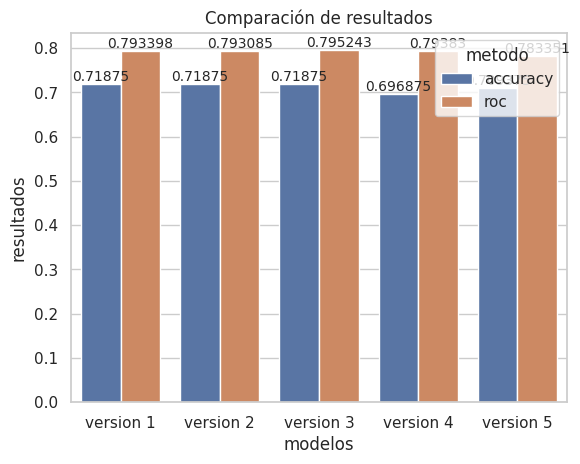

In [ ]:
modelos = ['version 1','version 2','version 3','version 4','version 5',
          'version 1','version 2','version 3','version 4','version 5']
metodo = ['accuracy','accuracy','accuracy','accuracy','accuracy',
         'roc','roc','roc','roc','roc']
resultados = [accuracy_score(ytest, prediction_1),accuracy_score(ytest, prediction_2),accuracy_score(ytest, prediction_3),
             accuracy_score(ytest, prediction_4),accuracy_score(ytest, prediction_5),roc_1,roc_2,roc_3,roc_4,roc_5]
resumen = pd.DataFrame(list(zip(modelos, metodo,resultados)),columns =['modelos', 'metodo', 'resultados'])
ax = sns.barplot(resumen, x="modelos", y="resultados", hue = "metodo");
ax.set(title='Comparación de resultados')
ax.bar_label(ax.containers[0], fontsize=10);
ax.bar_label(ax.containers[1], fontsize=10);

# **Conclusiones modelo logístico**

El **modelo versión 5** cumple con:

- [x] Multicolinealidad, al eliminar fixed_acidity que tenía un vif mayor a 5.
- [x] Linealidad entre variables independientes y log de probabilidad, al eliminar las variables fixed_acidity, free_sulfur_dioxide, density y sulphates que no tienen relación lineal con log de probabilidad.
- [x] No hay outliers fuertemente influyentes, al identificar que solo el 5.3% de los registros es outlier y solo el 0.3% es outlier extremo.
- [x] Independencia de las observaciones, al no detectar un patrón en los residuos.
- [x] Tamaño de muestra suficientemente grande, al tener más de 3 veces la cantidad mínima recomendada.

# **Conclusiones generales**

* Se consiguieron mejores resultados con la regresión logística que con la lineal para este caso de uso.

* Consideramos que es debido a que la regresión logística examina la probabilidad de que el vino sea de buena calidad o no, mientras la regresión lineal intenta predecir un valor exacto de calidad. En esta escenario se sacrifica la exactitud que puede dar un modelo lineal por la precisión que nos está mostrando el modelo logístico.

* Dependiendo del interés del usuario final, se puede intentar mejorar el modelo lineal con diferentes técnicas que tendrán costo (computacional o de disminución de interpretabilidad), pero por lo analizado en este documento puede que las variables consideradas no se adecuen del todo a este tipo de modelo y la mejora no sea significativa.

* El modelo logístico puede ser de mayor utilidad para el usuario final si solo quiere clasificar su producción, sin entrar en detalles de interpretabilidad de variables o escalas de calificación del vino.